Sriram Srinivasan, E334W844, URE Research - Summer / Fall 2021


In [1]:
# Data manipulation libraries
import pandas as pd
import os
from datetime import datetime

# train autoencoder for classification with no compression in the bottleneck layer
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
from tensorflow.keras import losses
from tensorflow.keras import metrics
from tensorflow.keras.optimizers import Adam


# Plotting
import matplotlib.pyplot as plt

# Verifying the cluster
# from kneed import KneeLocator
# from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans


In [2]:
!pip freeze

absl-py==0.12.0
alabaster==0.7.12
albumentations==0.1.12
altair==4.1.0
appdirs==1.4.4
argcomplete==1.12.3
argon2-cffi==21.1.0
arviz==0.11.4
astor==0.8.1
astropy==4.3.1
astunparse==1.6.3
atari-py==0.2.9
atomicwrites==1.4.0
attrs==21.2.0
audioread==2.1.9
autograd==1.3
Babel==2.9.1
backcall==0.2.0
beautifulsoup4==4.6.3
bleach==4.1.0
blis==0.4.1
bokeh==2.3.3
Bottleneck==1.3.2
branca==0.4.2
bs4==0.0.1
CacheControl==0.12.10
cached-property==1.5.2
cachetools==4.2.4
catalogue==1.0.0
certifi==2021.10.8
cffi==1.15.0
cftime==1.5.1.1
chardet==3.0.4
charset-normalizer==2.0.8
click==7.1.2
cloudpickle==1.3.0
cmake==3.12.0
cmdstanpy==0.9.5
colorcet==2.0.6
colorlover==0.3.0
community==1.0.0b1
contextlib2==0.5.5
convertdate==2.3.2
coverage==3.7.1
coveralls==0.5
crcmod==1.7
cufflinks==0.17.3
cvxopt==1.2.7
cvxpy==1.0.31
cycler==0.11.0
cymem==2.0.6
Cython==0.29.24
daft==0.0.4
dask==2.12.0
datascience==0.10.6
debugpy==1.0.0
decorator==4.4.2
defusedxml==0.7.1
descartes==1.1.0
dill==0.3.4
distributed==1.25.3


In [3]:
  # Separate code section for SourceIP
  import pandas as pd
  from io import StringIO
  col_list = ["SourceIP"]
  firefox_df = pd.read_csv('dump.22e976.csv', skipinitialspace = True, usecols = col_list)
  #firefox_df.drop(firefox_df.tail(1000).index,inplace=True)
  print(firefox_df)

  # First convert the string object of first 100 rows into a list. 
  # Then apply translation table property, 
  sourceIPObject = list(firefox_df.iloc[:].to_string(index=False, header=False).split("\n"))
  #print(sourceIPObject)

  # Start off with empty values and append them into the list incrementally from index 0 to index 100
  sIP = []
  for x in sourceIPObject:
    #print("X is: ", x)
    translation_table = dict.fromkeys(map(ord, '.'))
    sourceIPdotRemove = x.translate(translation_table)
    sourceIPdotRemove = int(sourceIPdotRemove)
    sIP.append(sourceIPdotRemove)
    #print("Updated value is: ", sourceIPdotRemove)

  # Put the "updated values" data back into the dataframe
  firefox_df["SourceIP"] = sIP

  # Prints the updated dataframe
  sIPdf = firefox_df
  print(sIPdf)

              SourceIP
0       192.168.20.111
1       192.168.20.111
2       192.168.20.111
3       192.168.20.111
4       192.168.20.111
...                ...
110632  192.168.20.111
110633  192.168.20.111
110634  192.168.20.111
110635  192.168.20.111
110636  192.168.20.111

[110637 rows x 1 columns]
           SourceIP
0       19216820111
1       19216820111
2       19216820111
3       19216820111
4       19216820111
...             ...
110632  19216820111
110633  19216820111
110634  19216820111
110635  19216820111
110636  19216820111

[110637 rows x 1 columns]


In [4]:
  # Separate code section for DestinationIP
  import pandas as pd
  from io import StringIO
  col_list = ["DestinationIP"]
  firefox_df = pd.read_csv('dump.22e976.csv', skipinitialspace = True, usecols = col_list)
  #firefox_df.drop(firefox_df.tail(1000).index,inplace=True)
  print(firefox_df)

  # First convert the string object of first 100 rows into a list. 
  # Then apply translation table property, 
  destIPObject = list(firefox_df.iloc[:].to_string(index=False, header=False).split("\n"))
  #print(sourceIPObject)

  # Start off with empty values and append them into the list incrementally from index 0 to index 100
  dIP = []
  for x in destIPObject:
    #print("X is: ", x)
    translation_table = dict.fromkeys(map(ord, '.'))
    destIPdotRemove = x.translate(translation_table)
    destIPdotRemove = int(destIPdotRemove)
    dIP.append(destIPdotRemove)
    #print("Updated value is: ", destIPdotRemove)

  # Put the "updated values" data back into the dataframe
  firefox_df["DestinationIP"] = dIP

  # Prints the updated dataframe
  dIPdf = firefox_df
  print(dIPdf)

         DestinationIP
0              8.8.8.8
1              8.8.8.8
2         3.248.137.36
3        13.226.139.65
4       104.102.253.71
...                ...
110632  172.217.13.194
110633         8.8.8.8
110634         8.8.8.8
110635  172.217.13.194
110636         8.8.8.8

[110637 rows x 1 columns]
        DestinationIP
0                8888
1                8888
2           324813736
3          1322613965
4         10410225371
...               ...
110632    17221713194
110633           8888
110634           8888
110635    17221713194
110636           8888

[110637 rows x 1 columns]


In [5]:
# Separate code section for DateTime
import pandas as pd
from datetime import datetime
from datetime import date
from datetime import time
from dateutil import parser
col_list = ["TimeStamp"]
firefox_df = pd.read_csv('dump.22e976.csv', skipinitialspace = True, usecols = col_list)
#firefox_df.drop(firefox_df.tail(1000).index,inplace=True)
print(firefox_df)

# Run the timestampObj for all rows in TimeStamp column
timestampObj = list(firefox_df.iloc[:].to_string(index=False, header=False).split("\n"))
#print("Time stamp object type: ", timestampObj)
# Split the string into 2 parts - date, time. Let d = date(TS[0], TS[1], TS[2]), and t = time (TS[3], TS[4], TS[5])
ts=[]
for x in timestampObj:
  #print("X is: ", x)
  temp = parser.parse(x).timestamp()
  ts.append(temp)
  #print("Epoch: ", temp)

# Put the "epoch data" back into original dataframe
firefox_df["TimeStamp"] = temp

# Prints the updated dataframe
TSdf = firefox_df
print(TSdf)

                  TimeStamp
0       2019-12-13 17:07:08
1       2019-12-13 17:07:11
2       2019-12-13 17:07:11
3       2019-12-13 17:07:11
4       2019-12-13 17:07:11
...                     ...
110632  2019-12-17 12:14:22
110633  2019-12-17 12:14:39
110634  2019-12-17 12:14:46
110635  2019-12-17 12:15:21
110636  2019-12-17 12:15:21

[110637 rows x 1 columns]
           TimeStamp
0       1.576585e+09
1       1.576585e+09
2       1.576585e+09
3       1.576585e+09
4       1.576585e+09
...              ...
110632  1.576585e+09
110633  1.576585e+09
110634  1.576585e+09
110635  1.576585e+09
110636  1.576585e+09

[110637 rows x 1 columns]


In [6]:
# Create a new dataframe and replace the 3 columns,
# while retaining all other columns in the dataframe, and
# then write to a new CSV file containing updated values and original values

# Create a new dataframe using the contents of the original dataframe
import pandas as pd
updateAllDF = pd.read_csv('dump.22e976.csv')
#updateAllDF.drop(updateAllDF.tail(1000).index,inplace=True)
#print(updateAllDF)

# Update the contents of SourceIP, DestinationIP, and Time Stamp, and DoH columns
updateAllDF["SourceIP"] = sIP
updateAllDF["DestinationIP"] = dIP
updateAllDF["TimeStamp"] = ts
updateAllDF.DoH[updateAllDF.DoH == False] = 0
updateAllDF.DoH[updateAllDF.DoH == True] = 1 

# Printing just the all rows of every column to ensure
# that we're getting int/float types
print(updateAllDF['SourceIP'])
print(updateAllDF["DestinationIP"])
print(updateAllDF['SourcePort'])
print(updateAllDF['DestinationPort'])
print(updateAllDF['TimeStamp'])
print(updateAllDF['Duration'])
print(updateAllDF['FlowBytesSent'])
print(updateAllDF['FlowSentRate'])
print(updateAllDF['FlowBytesReceived'])
print(updateAllDF['FlowReceivedRate'])
print(updateAllDF['PacketLengthVariance'])
print(updateAllDF['PacketLengthStandardDeviation'])
print(updateAllDF['PacketLengthMean'])
print(updateAllDF['PacketLengthMedian'])
print(updateAllDF['PacketLengthMode'])
print(updateAllDF['PacketLengthSkewFromMedian'])
print(updateAllDF['PacketLengthSkewFromMode'])
print(updateAllDF['PacketLengthCoefficientofVariation'])
print(updateAllDF['PacketTimeVariance'])
print(updateAllDF['PacketTimeStandardDeviation'])
print(updateAllDF['PacketTimeMean'])
print(updateAllDF['PacketTimeMedian'])
print(updateAllDF['PacketTimeMode'])
print(updateAllDF['PacketTimeSkewFromMedian'])
print(updateAllDF['PacketTimeSkewFromMode'])
print(updateAllDF['PacketTimeCoefficientofVariation'])
print(updateAllDF['ResponseTimeTimeVariance'])
print(updateAllDF['ResponseTimeTimeStandardDeviation'])
print(updateAllDF['ResponseTimeTimeMedian'])
print(updateAllDF['ResponseTimeTimeMode'])
print(updateAllDF['ResponseTimeTimeSkewFromMedian'])
print(updateAllDF['ResponseTimeTimeSkewFromMode'])
print(updateAllDF['ResponseTimeTimeCoefficientofVariation'])
print(updateAllDF['DoH'])

# Drop the first unlableled column in CSV file - the one that has the numbers appear
updateAllDF = updateAllDF.iloc[: , 1:]

# Write the contents of the updated dataframe (with old and new contents)
# to a new CSV file
updateAllDF.to_csv('updatedFireFox.csv')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


0         19216820111
1         19216820111
2         19216820111
3         19216820111
4         19216820111
             ...     
110632    19216820111
110633    19216820111
110634    19216820111
110635    19216820111
110636    19216820111
Name: SourceIP, Length: 110637, dtype: int64
0                8888
1                8888
2           324813736
3          1322613965
4         10410225371
             ...     
110632    17221713194
110633           8888
110634           8888
110635    17221713194
110636           8888
Name: DestinationIP, Length: 110637, dtype: int64
0         45226
1         45276
2         48600
3         56378
4         54264
          ...  
110632    58164
110633    49092
110634    49096
110635    58164
110636    49100
Name: SourcePort, Length: 110637, dtype: int64
0         443
1         443
2         443
3         443
4         443
         ... 
110632    443
110633    443
110634    443
110635    443
110636    443
Name: DestinationPort, Length: 110637, dtype

In [7]:
# Data is split into training and testing set
# Test size of 14% is applied here
# Extract X and y values
def process_data():
  #import pandas as pd
  #newFfoxDF = pd.read_csv('updatedFireFox.csv')
  #X = newFfoxDF.drop(columns=['DoH']).to_numpy()
  #y = newFfoxDF['DoH'].to_numpy()

  # Split the data into test and train
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
  print(X_train, X_test, y_train, y_test)
  return X, y, X_train, X_test, y_train, y_test

In [8]:
# Scale the data using min max scaling (restrict range to only 0-1)
def data_scaling(X_train, X_test, scale_range):
  scaler = MinMaxScaler(feature_range=(-1,1))
  scaler.fit(X_train)
  X_train_scaled = scaler.transform(X_train)
  X_test_scaled = scaler.transform(X_test)
  print("Scaled data of training set of X: ", X_train_scaled)
  print("Scaled data of testing set of X: ", X_test_scaled)
  return X_train_scaled, X_test_scaled

In [9]:
# Remove NaN from the dataframe of X_test of updatedFireFox.csv file
import pandas as pd
import numpy as np
# from sklearn.model_selection import train_test_split
newFfoxDF = pd.read_csv('updatedFireFox.csv')
#newFfoxDF.drop(newFfoxDF.tail(1000).index,inplace=True)
newFfoxDF = newFfoxDF.drop(columns=['ResponseTimeTimeMedian','ResponseTimeTimeSkewFromMedian'])
FalseDF = newFfoxDF.query("DoH == False").sample(n=7269)
TrueDF = newFfoxDF.query("DoH == True")
newFfoxDF = pd.concat([FalseDF, TrueDF]) 
X = newFfoxDF.drop(columns=['DoH']).to_numpy()
y = newFfoxDF['DoH'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_test)
TestX_NaN = np.isnan(X)
index = np.where(TestX_NaN ==True)
print(index)
#print(TestX_NaN[196,29])
# for i in range(TestX_NaN.shape[0]): # i is row
#   for j in range(TestX_NaN.shape[1]): # j is column
#     if TestX_NaN[i,j] == True:
#       print(X[i,j]) # print the index and column where there is NaN
#       #TestX_NaN[(:,i),[:,j]] = int(X_test) # replace the string values as int

      



















# THIS IS DONE WITH THE DATAFRAME APPROACH, NOT NUMPY APPROACH
# TestX_DF = pd.DataFrame(X_test)
# TestX_NaN = TestX_DF.isnull().values.any()
# print(TestX_NaN) # printed True = we do have NaN in the dataframe
# TestX_NaN_Index = pd.isnull(TestX_DF)
# for i in range(TestX_NaN_Index.shape[0]):
#   for j in range(TestX_NaN_Index.shape[1]):
#     if TestX_NaN_Index.iloc[i,j]==True:
#       print(i,j) # prints out the index and column where there is NaN
#       # Now convert NaN values from col. 29 & 31 into an int type


[[1.09575000e+05 8.88800000e+03 4.80960000e+04 ... 1.20000000e-05
  9.99768501e-01 9.99205261e-01]
 [2.66820000e+04 3.51831492e+10 5.68860000e+04 ... 1.59490000e-02
  7.15478974e-01 6.47703436e-01]
 [9.57300000e+04 1.04206716e+09 5.22740000e+04 ... 1.49890000e-02
  1.32329982e+00 1.09678218e-02]
 ...
 [6.39340000e+04 7.22191420e+07 3.65740000e+04 ... 1.00000000e-05
  7.87444507e-01 1.26733536e+00]
 [8.77000000e+04 1.04123196e+11 3.91840000e+04 ... 1.50000000e-05
  2.04577353e+00 4.88475188e-01]
 [1.08182000e+05 8.88800000e+03 4.68060000e+04 ... 1.54630000e-02
  9.21026275e-01 3.84817596e-03]]
(array([], dtype=int64), array([], dtype=int64))




Data loaded------------------------------------------------------------------------------------------------------


Processing data------------------------------------------------------------------------------------------------------
[[ 1.03750000e+05  8.88800000e+03  4.26840000e+04 ...  1.55410000e-02
  -1.00000000e+01  0.00000000e+00]
 [ 4.44200000e+04  1.32261396e+09  4.53820000e+04 ...  2.68060000e-02
  -1.00000000e+01  0.00000000e+00]
 [ 1.06229000e+05  8.88800000e+03  4.49940000e+04 ...  2.52210000e-02
   1.09517223e+00  4.45536867e-03]
 ...
 [ 1.04040000e+05  1.92168201e+10  4.43000000e+02 ...  1.80000000e-05
   7.53689152e-01  9.15039272e-01]
 [ 1.05372000e+05  8.88800000e+03  4.41920000e+04 ...  1.54840000e-02
   1.23717389e+00  2.54982275e-03]
 [ 4.05380000e+04  4.72462325e+09  5.54600000e+04 ...  7.10000000e-05
   1.54580042e+00  6.46081437e-01]] [[1.09575000e+05 8.88800000e+03 4.80960000e+04 ... 1.20000000e-05
  9.99768501e-01 9.99205261e-01]
 [2.66820000e+04 3.51831492e+

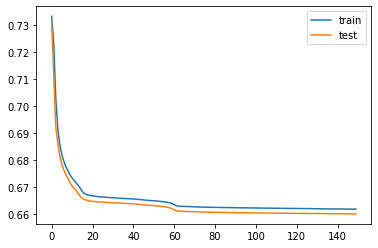

In [30]:
# Code to train the autoencoder using updatedFireFox.csv file
"""---
## Select options ------------------------------------------------------------------------------------------------------
"""
import pandas as pd
import numpy as np
epochs = 150
batch_size = 32
scaled = True
scale_range = (0, 1)
neurons = 3

# epoch 6/6 [==============================] - 0s 15ms/step - loss: 0.6761 - accuracy: 0.4379 - val_loss: 0.6744 - val_accuracy: 0.4756
# epoch 117/117 [==============================] - 0s 4ms/step - loss: 0.6682 - accuracy: 0.6485 - val_loss: 0.6670 - val_accuracy: 0.6640
# epoch 12/12 [==============================] - 0s 10ms/step - loss: 0.6747 - accuracy: 0.5376 - val_loss: 0.6733 - val_accuracy: 0.5464
loss_function_list = ['mse',                                    # 0
                      'mean_squared_logarithmic_error',         # 1
                      'binary_crossentropy'                     # 2
                      ]
number_loss = 0

loss_dict = {
    '0':'MSE',
    '1':'MSLE',
    '2':'BCROSS',
}

# Reading data
# import pandas as pd
# print('\n\nReading data------------------------------------------------------------------------------------------------------')
# newFfoxDF = pd.read_csv('updatedFireFox.csv')
# print(newFfoxDF.iloc[0])
# #print(newFfoxDF['DoH']) # before
# #newFfoxDF.DoH[newFfoxDF.DoH == False] = 0
# #newFfoxDF.DoH[newFfoxDF.DoH == True] = 1
# #print(newFfoxDF['DoH']) # after
print('\n\nData loaded------------------------------------------------------------------------------------------------------')

# Processing data
print('\n\nProcessing data------------------------------------------------------------------------------------------------------')

# X, y, X_train, X_test, y_train, y_test = process_data()
print('\n\nData processed------------------------------------------------------------------------------------------------------')

# Scaling data based on option
if(scaled):
    X_train, X_test = data_scaling(X_train, X_test, scale_range)

# The appropriate loss function is calculated using whatever number_loss (MSE, log MSE, binary cross entropy) is chosen above
loss_function = loss_function_list[number_loss] 
print("\n\nStarting autoencoder process for loss function------------------------------------------------------------------------------------------------------\n\t", loss_function)

# Get the directory to store all files in
if(scaled):
  key = str(number_loss)
  filename = str(loss_dict[key]) + '_' + str(neurons) + '-Neurons_' + str(scale_range[0]) + '-' + str(scale_range[1]) + '-Scaled_' + str(epochs) + '-epochs'
else:
  filename = str(loss_dict[key]) + '_' + str(neurons) + '-Neurons_' + str(epochs) + '-epochs'

# START OF AUTOENCODER DESIGN CODE -----------------------------------------------------------------------------------
#model, encoder_no_decoder = design_autoencoder(X, neurons, loss_function, activation = 'linear')
# Encoder design
number_of_inputs = X.shape[1]
input_encoder = Input(shape=(number_of_inputs))

# Encoder level 1
encoder_1 = Dense(number_of_inputs, activation='sigmoid')(input_encoder)
encoder_1 = BatchNormalization()(encoder_1)
encoder_1 = LeakyReLU()(encoder_1)
#encoder_1 = Sigmoid()(encoder_1)

# Encoder level 2
encoder_2 = Dense(number_of_inputs/2, activation='sigmoid')(encoder_1)
encoder_2 = BatchNormalization()(encoder_2)
encoder_2 = LeakyReLU()(encoder_2)
#encoder_2 = Sigmoid()(encoder_2)

# # Encoder level 3 - add a decoder one
# encoder_3 = Dense(number_of_inputs/4)(encoder_2)
# encoder_3 = BatchNormalization()(encoder_3)
# encoder_3 = LeakyReLU()(encoder_3)

divisor = number_of_inputs / neurons

# Bottleneck design
bottleneck_inputs = number_of_inputs / divisor
bottleneck = Dense(bottleneck_inputs)(encoder_2)

# Decoder design
# Decoder Level 1
decoder_1 = Dense(number_of_inputs/2, activation='sigmoid')(bottleneck)
decoder_1 = BatchNormalization()(decoder_1)
decoder_1 = LeakyReLU()(decoder_1)
#decoder_1 = Sigmoid()(encoder_2)

# Decoder Level 2
decoder_2 = Dense(number_of_inputs, activation='sigmoid')(decoder_1)
decoder_2 = BatchNormalization()(decoder_2)
decoder_2 = LeakyReLU()(decoder_2)
#decoder_2 = Sigmoid()(encoder_2)

# decoder_3 = Dense(number_of_inputs)(decoder_2)
# decoder_3 = BatchNormalization()(decoder_3)
# decoder_3 = LeakyReLU()(decoder_3)

#output = Dense(number_of_inputs, activation='linear')(decoder_2) - ORIGINALLY WRITTEN BY AMAN
output = Dense(number_of_inputs, activation='softmax')(decoder_2) # I WROTE THIS PART OUT BASED ON STACK OVERFLOW

# Defining the autoencoder model
model = Model(inputs=input_encoder, outputs=output)
model.compile(Adam(0.01,epsilon=0.1), loss=loss_function, metrics=['mse'])
plot_model(model, "autoencoder.png", show_shapes=True)

# define an encoder model (without the decoder)
encoder_no_decoder = Model(inputs=input_encoder, outputs=bottleneck)
plot_model(encoder_no_decoder, 'encoder.png', show_shapes=True)
# END OF AUTOENCODER DESIGN CODE -----------------------------------------------------------------------------------

# TRAINING -------------------_-------------------_-------------------_-------------------_-------------------_-----
assert not np.any(np.isnan(X_test))
#print("X test:", X_test[0][:],X_test[0][:]) # giving an assert error (means there is NaN hidden somewhere in the dataframe)
history = model.fit(X_train,
                    X_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    verbose=1,
                    validation_data=(X_test, X_test)
                    )
# -------------------_-------------------_-------------------_-------------------_-------------------_--------------_

# Plotting results
try:
    print("The accuracy is", history.history['accuracy'])
except Exception as e:
    print('Accuracy could NOT be extracted', str)

training_fig, training_ax = plt.subplots(1)
training_ax.plot(history.history['loss'], label='train')
training_ax.plot(history.history['val_loss'], label='test')
training_ax.legend()
# training_fig.show()
training_fig.savefig("training.png")

# IGNORE BELOW. NOT PART OF CODE
# os.chdir('/home/x397j446/main-project/finalRuns/'+filename)
#os.mkdir('/content/'+filename)
#os.chdir('/content/'+filename)t

In [31]:
def plotcolor(coord_list):
    colors = []
    for item in coord_list:
        if item == 1:
            colors.append('red')
        else:
            colors.append('green')
    return colors

In [32]:
def generate_2d_plot(x_coord, y_coord, plt_colors, Kmeans_bool):
    fig_2d, ax_2d = plt.subplots(1)

    ax_2d.scatter(x_coord, y_coord, c=plt_colors)

    ax_2d.set_xlabel('X Label - Pred')
    ax_2d.set_ylabel('Y Label - Pred')
    
    # fig_2d.show()
    if(Kmeans_bool):
      fig_2d.savefig('prediction_2D_Kmeans_clustering.png')
    else:
      fig_2d.savefig('prediction_2D.png')


def generate_3d_plot(x_coord, y_coord, z_coord, plt_colors):
    try:
        fig = plt.figure()

        ax = fig.add_subplot(111, projection='3d')

        ax.scatter(x_coord, y_coord, z_coord, c=plt_colors)

        ax.set_xlabel('X Label - Pred')
        ax.set_ylabel('Y Label - Pred')
        ax.set_zlabel('Z Label - Pred')

        # plt.show()
        plt.savefig('prediction_3D.png')
        return "Success", 'ExceptionNOT'

    except Exception:
        return "Error in generate 3d plot function", Exception

######## PREDICTION values ########
[[ 2.0266619   1.2386125  -0.6953333 ]
 [-1.3000319  -1.4087064  -0.22573657]
 [-0.5155862  -0.5120257  -0.13439748]
 ...
 [-0.03303672 -0.19418314 -1.1270963 ]
 [-0.34345412  0.9133353  -0.19609329]
 [ 2.0856137   1.6645834   0.31321222]]
######## ACTUAL values ############
[1. 0. 0. ... 0. 0. 1.]


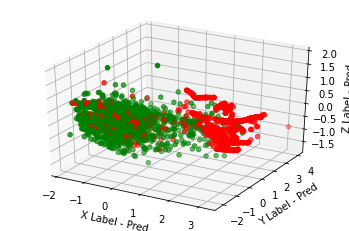

In [33]:
# PREDICTION -------------------_-------------------_-------------------_-------------------_-------------------_--_


# Trying to compare actual output (y_test) against predicted output (with input X_test)
prediction_output = encoder_no_decoder.predict(X_test)
print("######## PREDICTION values ########")
print(prediction_output)

print("######## ACTUAL values ############")
print(y_test)


# SAVE PREDICTION DATA -------------------_-------------------_-------------------_-------------------_-------------
neuron_header_list = []
for neuron in range(0, neurons):
    neuron_header_list.append('n' + str(neuron + 1))

prediction_data = pd.DataFrame(
    prediction_output,
    columns=neuron_header_list
    )

prediction_data.to_csv('predicted_data.csv', index=False)


x_coord = []
y_coord = []
z_coord = []


for i in range(0, len(prediction_output)):
    x_coord.append(prediction_output[i][0])
    y_coord.append(prediction_output[i][1])


plt_colors = plotcolor(y_test)
if(neurons == 2):
    print('Printing graphs')
    generate_2d_plot(x_coord, y_coord, plt_colors, False)
    print('Graphs printed')

elif(neurons == 3):
    for i in range(0, len(prediction_output)):
        z_coord.append(prediction_output[i][2])

    message, exception = generate_3d_plot(x_coord, y_coord, z_coord, plt_colors)

else:
    print('Too many neurons. Saving prediction output for further analysis. No GRAPHS will be generated')





 Performing K-Means analysis

	Inertia of predicted data based on K-Means is 2240.24658203125

	Cluster centers predicted data based on K-Means is [[-0.81626123 -0.30353588 -0.19929242]
 [ 1.9128299   1.4822311  -0.33045483]]

	Iterations required 3
KMEANS LABELS [1 0 0 ... 0 0 1]


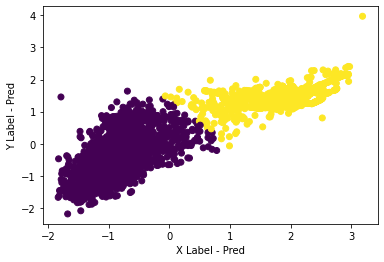

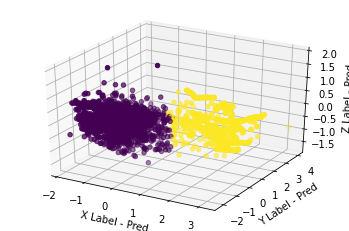

In [34]:
from enum import auto
print('\n\n Performing K-Means analysis')
from sklearn.cluster import KMeans
### -----------------
kmeans = KMeans(
    init='k-means++',
    n_clusters=2,
    n_init=20,
    max_iter=300,
    random_state=None,
    #precompute_distances=True,
    #algorithm='elkan',
    algorithm = 'elkan'
)

kmeans.fit(prediction_output)

print("\n\tInertia of predicted data based on K-Means is", kmeans.inertia_)
print("\n\tCluster centers predicted data based on K-Means is", kmeans.cluster_centers_)
print("\n\tIterations required", kmeans.n_iter_)
print('KMEANS LABELS', kmeans.labels_)

if(neurons == 2):
    generate_2d_plot(x_coord, y_coord, kmeans.labels_, True)
elif(neurons == 3):
    generate_2d_plot(x_coord, y_coord, kmeans.labels_, True)
    generate_3d_plot(x_coord, y_coord, z_coord, kmeans.labels_)

# ---------------------------------------------------------------------------------------------------------------

## 3D graph plotting and copying to google drive

In [35]:
#from sklearn.cluster import KMean
if(neurons == 3):
    import plotly.graph_objects as go
    import numpy as np
    import plotly.express as px


    fig111 = px.scatter_3d(x=x_coord, 
                          y=y_coord, 
                          z=z_coord,
                          color=kmeans.labels_, 
                          opacity=0.6, 
                          color_continuous_scale='bluered'
                          )

    fig111.write_html('3D_graph_movable_KMeans_Labels.html')


# !cp bcross-2-cluster-2clus-old-run.html /content/drive/MyDrive/temp/



## Clustering check (K-means VS Autoencoder prediction)

In [36]:
from sklearn.metrics import confusion_matrix
#from sklearn.cluster import KMeans

#conf_matrix = confusion_matrix(y_test, KMeans.labels_)
conf_matrix = confusion_matrix(y_test, kmeans.labels_)
print(conf_matrix)

f = open( 'confusion_matrix.txt', 'w' )
f.write( 'CONF_MATRIX' + repr(conf_matrix) + '\n' )
f.close()

[[1314  121]
 [ 190 1283]]


In [37]:
tn, fp, fn, tp = confusion_matrix(y_test, kmeans.labels_).ravel()
print('True Negative', tn)
print('False Positive', fp)
print('False Negative', fn)
print('True Positive', tp)

True Negative 1314
False Positive 121
False Negative 190
True Positive 1283


In [38]:
test_vs_pred_labels_dict = {
    'test_data_labels': y_test,
    'kmeans_labels': kmeans.labels_
}
test_vs_pred_labels_pd = pd.DataFrame(test_vs_pred_labels_dict)
test_vs_pred_labels_pd.to_csv('test_vs_pred_labels.csv')

In [40]:
from tensorflow.python.keras.metrics import accuracy
from sklearn.metrics import precision_recall_fscore_support
precision, recall, fscore, nothing = precision_recall_fscore_support(y_test, 
                                                                     kmeans.labels_, 
                                                                     average='binary')
accuracy = (tp + tn) / (tn + fp + fn + tp)
print('PRECISION:', precision)
print('ACCURACY:', accuracy)
print('RECALL:', recall)
print('FSCORE:', fscore)

PRECISION: 0.9138176638176638
ACCURACY: 0.8930536451169189
RECALL: 0.8710115410726409
FSCORE: 0.89190128606187
